# Problema 2
Descripción:
El objetivo de este ejercicio es implementar un sistema de clasificación de gestos de "piedra", "papel" o "tijeras" utilizando MediaPipe para la detección de las manos y una red neuronal densa para realizar la clasificación. El ejercicio se dividirá en tres partes, cada una implementada en un script de Python.

Doc de MediaPipe para detección de landmarks:

https://ai.google.dev/edge/mediapipe/solutions/vision/hand_landmarker

## Objetivo:
- 1) Grabación del dataset de gestos: En esta primera parte, se implementará un script llamado record-dataset.py, que permitirá grabar un dataset de gestos utilizando la cámara web y MediaPipe para detectar los landmarks (puntos clave) de la mano. Cada gesto se etiquetará como "piedra" (0), "papel" (1) o "tijeras" (2) y se almacenará junto con sus coordenadas en archivos .npy.

- 2) Entrenamiento del clasificador de gestos: En esta segunda parte, se implementará un script llamado train-gesture-classifier.py, donde se entrenará una red neuronal densa utilizando los datos de los landmarks obtenidos en la primera parte. El modelo resultante será capaz de clasificar los gestos basándose en las posiciones de los puntos clave de la mano.

- 3) Prueba del sistema completo: En la tercera parte, se implementará un script llamado rock-paper-scissors.py, que tomará como entrada la imagen de la cámara web, utilizará MediaPipe para detectar los landmarks de la mano, y clasificará el gesto en "piedra", "papel" o "tijeras" utilizando el modelo entrenado.

## Tareas:

- Script 1: Grabación del dataset (record-dataset.py)
    - Usar la cámara web para capturar imágenes de la mano.
    - Utilizar MediaPipe para detectar los landmarks de la mano (21 puntos clave con coordenadas x y y).
    - Almacenar las coordenadas de los landmarks junto con la etiqueta correspondiente (0 para "piedra", 1 para "papel", 2 para "tijeras") en archivos .npy (por ejemplo, rps_dataset.npy y rps_labels.npy).

- Script 2: Entrenamiento del clasificador (train-gesture-classifier.py)
    - Cargar los datos del dataset grabado en la primera parte.
    - Implementar una red neuronal densa que tome como entrada las coordenadas x y y de los 21 puntos clave (un total de 42 entradas).
    - Entrenar la red para clasificar los gestos en "piedra", "papel" o "tijeras" usando el dataset.
    - Guardar el modelo entrenado en un archivo (por ejemplo, rps_model.h5).

- Script 3: Prueba del sistema completo (rock-paper-scissors.py)
    - Cargar el modelo entrenado.
    - Capturar imágenes de la cámara web en tiempo real.
    - Usar MediaPipe para detectar los landmarks y alimentar estos datos al modelo para clasificar el gesto.
    - Mostrar el gesto reconocido en pantalla.



## Script 1

### Librerias

In [3]:
%pip install -q opencv-python

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Ignacio González\\Desktop\\unr\\3A - 1C\\AA2\\TPs-AA2\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os
import urllib.request
import numpy as np
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

2025-05-09 11:37:52.394507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Grabar de imágenes

In [ ]:
webcam = cv2.VideoCapture(0)
counter = 1

print("--- Instrucciones ---")
print("Presiona 's' para guardar una foto.")
print("Presiona 'q' para salir.")

while True:
    try:
        check, frame = webcam.read()
        if not check:
            print("No se pudo capturar el frame.")
            break

        cv2.imshow("Capturando (Presiona 's' para guardar, 'q' para salir)", frame)

        key = cv2.waitKey(1)

        if key == ord('s'): 
            dir = f"./fotos/piedra"
            filename = f"{dir}/piedra_{counter}.jpg"
            os.makedirs(dir, exist_ok=True)
            cv2.imwrite(filename, frame)
            print(f"Foto guardada como: {filename}")
            counter += 1 

        elif key == ord('q'):
            print("Apagando cámara...")
            webcam.release()
            cv2.destroyAllWindows()
            print("Programa terminado.")
            break

    except KeyboardInterrupt:
        print("\nApagando cámara...")
        webcam.release()
        cv2.destroyAllWindows()
        print("Programa terminado.")
        break

### Encontrar landmarks y guardarlos

In [2]:
url = 'https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task'

urllib.request.urlretrieve(url, "model.task")

('model.task', <http.client.HTTPMessage at 0x7fc2a42d8a90>)

In [2]:
base_options = python.BaseOptions(model_asset_path='./model.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                        num_hands=1)

In [3]:
detector = vision.HandLandmarker.create_from_options(options)


I0000 00:00:1746627347.188540    1301 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [9]:
ppt = ['papel','piedra','tijera']
ppt_2 = ['Imagenes_mano_tijera', 'Imagenes_mano_papel', 'Imagenes_mano_piedra']

os.makedirs(os.path.join('./', 'clase_papel'), exist_ok=True)
os.makedirs(os.path.join('./', 'clase_tijera'), exist_ok=True)
os.makedirs(os.path.join('./', 'clase_piedra'), exist_ok=True)

for gesto in ppt:
    for i, foto in enumerate(os.listdir(f'./fotos/fotos_Gonza/{gesto}')):
        shutil.copy2(f'./fotos/fotos_Gonza/{gesto}/{foto}', f'./clase_{gesto}/{gesto}_{i+1}.jpg')
    for j, foto in enumerate(os.listdir(f'./fotos/{gesto}')):
        shutil.copy2(f'./fotos/{gesto}/{foto}', f'./clase_{gesto}/{gesto}_{i+j+2}.jpg')

for carpeta in ppt_2:
    eleccion = carpeta.split('_')[2]
    for u ,foto in enumerate(os.listdir(f'./fotos/{carpeta}')):
        shutil.copy2(f'./fotos/{carpeta}/{foto}', f'./clase_{eleccion}/{eleccion}_{u+i+j+3}.jpg')


In [ ]:
os.makedirs(os.path.join('./', 'img_clases'), exist_ok=True)
shutil.move('./clase_papel', './img_clases')
shutil.move('./clase_tijera', './img_clases')
shutil.move('./clase_piedra', './img_clases')

'./img_clases/clase_papel'

In [ ]:
train_data_dir = './img_clases'  # Cambia esto
output_dir = './augmented_images'  # Carpeta para guardar imágenes aumentadas
os.makedirs(output_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=30,        # Rotación aleatoria (grados)
    width_shift_range=0.1,   # Desplazamiento horizontal (fracción del ancho)
    height_shift_range=0.1,  # Desplazamiento vertical (fracción del alto)
    shear_range=0.2,         # Deformación de corte
    zoom_range=0.2,          # Zoom aleatorio [0.8, 1.2]
    horizontal_flip=True,     # Volteo horizontal aleatorio
    vertical_flip=True,      # No volteo vertical (depende de tu dataset)
    brightness_range=[0.8, 1.2],  # Variación de brillo
    fill_mode='nearest'       # Estrategia para rellenar pixeles
)

batch_size = 32
img_width, img_height = 640, 480  # Ajusta según tus necesidades

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Para 3 clases
    save_to_dir=output_dir,    # Opcional: guardar imágenes aumentadas
    save_prefix='aug',         # Prefijo para imágenes guardadas
    save_format='jpg'         # Formato de guardado
)

Found 4067 images belonging to 3 classes.


In [18]:
augmentation_factor = 3

def augment_and_save(class_folder):
    class_path = os.path.join(train_data_dir, class_folder)
    output_class_path = os.path.join(output_dir, class_folder)
    os.makedirs(output_class_path, exist_ok=True)
    
    print(f'Procesando clase: {class_folder}')
    
    for img_name in os.listdir(class_path):
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
            
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)  # Cargar imagen original
        x = img_to_array(img)     # Convertir a array numpy
        x = x.reshape((1,) + x.shape)  # Añadir dimensión de batch
        
        # Guardar imagen original
        original_filename = f'original_{img_name}'
        img.save(os.path.join(output_class_path, original_filename))
        
        # Generar imágenes aumentadas
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                 save_to_dir=output_class_path,
                                 save_prefix='aug',
                                 save_format='jpeg'):
            i += 1
            if i >= augmentation_factor:
                break  # Detener después de generar 'augmentation_factor' imágenes


for class_folder in os.listdir(train_data_dir):
    if os.path.isdir(os.path.join(train_data_dir, class_folder)):
        augment_and_save(class_folder)

Procesando clase: clase_papel
Procesando clase: clase_piedra
Procesando clase: clase_tijera


In [ ]:
lista_puntos = []
lista_labels = []
ppt = ['clase_papel','clase_piedra','clase_tijera']


for gesto in ppt:
    for i, foto in enumerate(os.listdir(f'./augmented_images/{gesto}')):
        mp_image = mp.Image.create_from_file(f'./augmented_images/{gesto}/{foto}')
        if gesto == 'clase_papel':
            lista_labels.append(1)
        elif gesto == 'clase_piedra':
            lista_labels.append(0)
        else:
            lista_labels.append(2)

        hand_landmarker_result = detector.detect(mp_image)
        try:
            lista_puntos.append([coord for lm in hand_landmarker_result.hand_landmarks[0] for coord in (lm.x, lm.y)])
        except:
            lista_labels.pop()


In [4]:
print(len(os.listdir('./augmented_images/clase_papel')), len(os.listdir('./augmented_images/clase_piedra')), len(os.listdir('./augmented_images/clase_tijera')))

4204 4325 5519


In [24]:
np.save('./rps_dataset.npy', lista_puntos)
np.save('./rps_labels.npy', lista_labels)

## Script 2

### Librerias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from pathlib import Path
from keras.layers import Input, Dropout
from keras.layers import Dense, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

### Entrenamiento del clasificador

In [26]:
x_data = np.load('./rps_dataset.npy')
y_data = np.load('./rps_labels.npy')

In [27]:
x_temp, x_test, y_temp, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=123,stratify=y_data)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=321, stratify=y_temp)

In [28]:
from tensorflow.keras.utils import to_categorical

# Suponiendo que tenés 3 clases (0, 1, 2)
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [29]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


2025-05-07 16:32:18.762995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:10:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-07 16:32:18.822342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:10:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-07 16:32:18.822670: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:10:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-07 16:32:18.831487: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:10:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-07 16:32:18.831868: I tensorflow/compile

In [ ]:
def build_model(input_shape):
    i = Input(input_shape, dtype=tf.float32)

    x = Dense(32)(i)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    x = Dense(16)(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)
    
    x = Dense(3)(x)
    output = Activation('softmax')(x)

    return tf.keras.Model(inputs=i, outputs=output)


In [31]:
print("Building model")
model = build_model(input_shape=(x_train.shape[1],))

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

Building model


In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense (Dense)               (None, 32)                1376      
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0     

In [33]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=0, mode="min", restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=8, verbose=1, min_delta=1e-4, mode="min"
)

In [34]:
history = model.fit(
    x_train,
    y_train_cat,
    validation_data=(x_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
)

Epoch 1/100


2025-05-07 16:32:35.670493: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f65381d7380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-07 16:32:35.670609: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 960, Compute Capability 5.2
2025-05-07 16:32:35.791881: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-07 16:32:35.955704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-05-07 16:32:36.568546: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/224 [==============================] - 6s 14ms/step - loss: 1.0803 - accuracy: 0.4266 - val_loss: 1.0375 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 2/100
224/224 [==============================] - 3s 13ms/step - loss: 0.9965 - accuracy: 0.5430 - val_loss: 0.9126 - val_accuracy: 0.7295 - lr: 0.0010
Epoch 3/100
224/224 [==============================] - 3s 13ms/step - loss: 0.8392 - accuracy: 0.6739 - val_loss: 0.7089 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 4/100
224/224 [==============================] - 3s 12ms/step - loss: 0.6484 - accuracy: 0.7718 - val_loss: 0.5031 - val_accuracy: 0.8660 - lr: 0.0010
Epoch 5/100
224/224 [==============================] - 3s 13ms/step - loss: 0.4966 - accuracy: 0.8314 - val_loss: 0.3826 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 6/100
224/224 [==============================] - 3s 14ms/step - loss: 0.4097 - accuracy: 0.8585 - val_loss: 0.3148 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 7/100
224/224 [==============================] - 3s 13ms/step - 

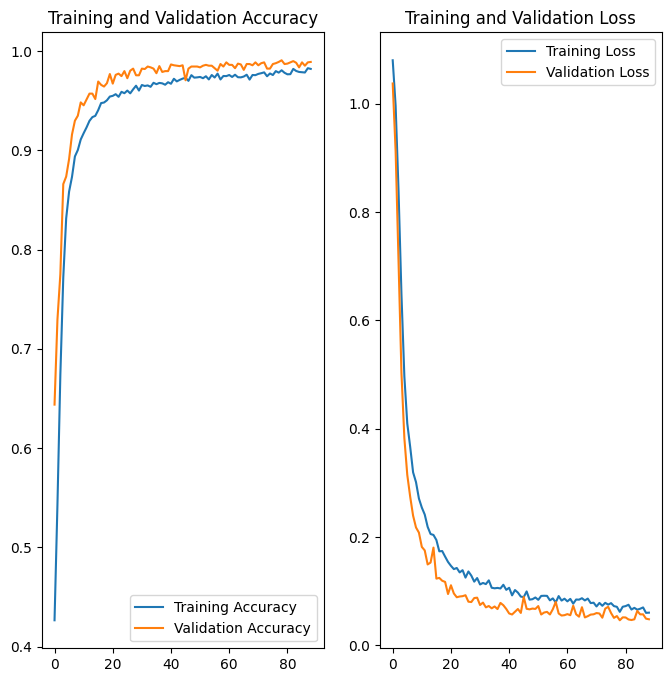

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Guardar modelo

In [36]:
model.save('rps_model.h5')

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Script 3

### Librerias

In [34]:
rps_model = tf.keras.models.load_model('rps_model.h5')

In [35]:
import cv2
import time
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import tensorflow as tf

# Cargar modelo entrenado
modelo = tf.keras.models.load_model("rps_model.h5")

# Clases
clases = ["Piedra", "Papel", "Tijera"]

# Iniciar MediaPipe Task
base_options = python.BaseOptions(model_asset_path='c:/models/model.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

# Para dibujar
# mp_drawing = mp.solutions.drawing_utils
# mp_hands = mp.solutions.hands  # solo para conexiones

# Iniciar webcam
cap = cv2.VideoCapture(0)

print("--- Instrucciones ---")
print("Presiona 'q' para salir.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error al capturar frame.")
        break

    frame = cv2.flip(frame, 1)  # espejo
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Crear imagen de MediaPipe
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb)
    result = detector.detect(mp_image)

    prediccion = None

    if result.hand_landmarks:
        landmarks = result.hand_landmarks[0]  # 21 puntos

        # Extraer x, y
        entrada = np.array([coord for lm in landmarks for coord in (lm.x, lm.y)])
        entrada = np.expand_dims(entrada, axis=0)  # (1, 42)

        salida = modelo.predict(entrada, verbose=0)
        clase_idx = np.argmax(salida)
        prediccion = clases[clase_idx]
        print(prediccion, salida)
        # Dibujar los landmarks
        # mp_drawing.draw_landmarks(frame, result.hand_landmarks[0], mp_hands.HAND_CONNECTIONS)

    # Mostrar resultado
    if prediccion:
        cv2.putText(frame, f"Eleccion: {prediccion}", (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Piedra, Papel o Tijera", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


--- Instrucciones ---
Presiona 'q' para salir.
Error al capturar frame.
